<a href="https://colab.research.google.com/github/Twixii99/Machine-Learning-problems/blob/main/New_York_City_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-21 22:59:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.2’

AB_NYC_2019.csv.2   100%[===================>]   6.75M  --.-KB/s    in 0.04s   

2021-09-21 22:59:58 (172 MB/s) - ‘AB_NYC_2019.csv.2’ saved [7077973/7077973]



In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
n = len(df)
print("the size of our data frame %i records." % n)

the size of our data frame 48895 records.


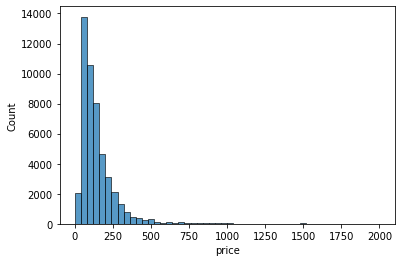

In [ ]:
sns.histplot(df.price[df.price < 2000], bins=50)
# after plotting the price column then the plot has long tail distribution, after maybe 600.

In [ ]:
print("The datframe has %i string based columns." % len(df.dtypes[df.dtypes == object]))

The datframe has 6 string based columns.


In [ ]:
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']
target = df.price

# Question 1

In [ ]:
# Here we only checking the null values and see their number just in the features list as well as the price.
features_no_nans = df[features + ['price']].isnull().sum()
features_with_a_missing_value = features_no_nans[features_no_nans > 0]
# we find that there's only one feature that has NAN values.
print("The feature with missing values is {} and the number of NANs is {}".format(features_with_a_missing_value.index.to_list(), features_with_a_missing_value.values))

The feature with missing values is ['reviews_per_month'] and the number of NANs is [10052]


In [ ]:
df.isnull().sum()[features + ['price']]

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

# Question 2

### Notes:
There are three ways to find the meadian:
- pandas -> df[\' sth \'].median()
- pandaa -> df.describe(percentiles=[0.5]) -> this will give you summery about the whole dataframe.
- numpy -> numpy.median(df['sth'])
df.minimum_nights.median()
df.describe(percentiles=[0.5])[features + ['price']]

In [ ]:
df.minimum_nights.median()

3.0

In [ ]:
df.describe(percentiles=[0.5])[features + ['price']]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.373221,7.143982,112.781327,152.720687
std,0.054530,0.046157,20.510550,44.550582,1.680442,32.952519,131.622289,240.154170
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000,106.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000


## For shuffling the data we create a numpy array with the whole range [0, number of rows in df)

In [ ]:
idx = np.arange(n)

In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

# Splitting the data to 20% validation, 20% test and 60% training

In [ ]:
n_validate = int(n * 0.2)
n_test = int(n * 0.2)
n_train =  n - n_validate - n_test
print('size of train set = {}, validation set = {}, test set = {}'.format(n_train, n_validate, n_test))
assert(n_train + n_validate + n_test == n)

size of train set = 29337, validation set = 9779, test set = 9779


In [ ]:
# we are getting the data using the shuffled array and we reset the index to 0 -> n_train and we just get the features we want from the whole columns.
# now we have train, validation and test sets with NAN values (we need to take an action to deal with it).
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)[features + ['price']]
df_validate = df.iloc[idx[n_train:n_train + n_validate]].reset_index(drop=True)[features + ['price']]
df_test = df.iloc[idx[n_train + n_validate:]].reset_index(drop=True)[features + ['price']]

In [ ]:
# Here we take the target variables out of the train, val and test sets and assign them to the corresponding meaningful variable.
# we also applay the logarithmic distribution so we end up with bell shape(normal distribution).
y_train = np.log1p(df_train.price.values)
y_validate = np.log1p(df_validate.price.values)
y_test = np.log1p(df_test.price.values)

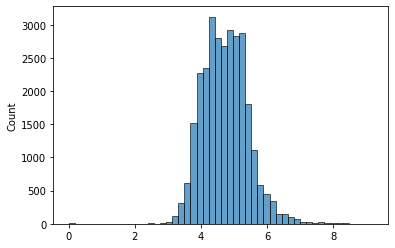

In [ ]:
sns.histplot(data=y_train, bins=50, alpha=0.7)

In [ ]:
# After running these 3 lines we just remove the price column form the train, validate and test sets.
del df_train['price']
del df_validate['price']
del df_test['price']

# Question 3 (shared function between zero fill and mean fill)

Now we start this section having 6 differnet variables 
1. test set. 
2. validation set.   
3. test set.

4. target variables associated with the train set.
5. target variables associated with the validation set.
6. target variables associated with the test set.

In [ ]:
# the linear regression model.
# it's in the most compact form which er end up having a compined set containg the (W0, W set weights) we need to sparate them.
def logistic_regression_training(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
# the root mean square error metric.
def RMSE(y_hat, y):
  return np.sqrt(np.power(y_hat - y, 2).mean())

# we here suffering from the problem of precission

In [ ]:
df_train['reviews_per_month'].sum() / (len(df_train['reviews_per_month']) - df_train['reviews_per_month'].isnull().sum())

1.3685492094776983

In [ ]:
df_train['reviews_per_month'].mean(), df_validate['reviews_per_month'].mean(), df_test['reviews_per_month'].mean()

(1.3685492094777056, 1.376658902691513, 1.3838284465020692)

In [ ]:
# filling the 3 sets NAN values with 0 
df_train_0 = df_train.fillna(0)
df_validate_0 = df_validate.fillna(0)
df_test_0 = df_test.fillna(0)

In [ ]:
df_train_0['reviews_per_month'].mean(), df_validate_0['reviews_per_month'].mean(), df_test_0['reviews_per_month'].mean()

(1.0887469748099727, 1.0879251457204226, 1.1003834747929329)

In [ ]:
train_mean = df_train['reviews_per_month'].mean()

In [ ]:
# filling the 3 sets NAN values with the mean value and because we have only one column that has this type of NANs the we just need its mean value to use.
df_train_m = df_train.fillna(train_mean)
# take care here we take the mean of from the training set and use it for validation and test.
df_validate_m = df_validate.fillna(train_mean)
df_test_m = df_test.fillna(train_mean)

In [ ]:
df_train_m['reviews_per_month'].mean(), df_validate_m['reviews_per_month'].mean(), df_test_m['reviews_per_month'].mean()

(1.3685492094777751, 1.3749580149952276, 1.380698851271448)

In [ ]:
# we have the target values for each set in terms of numpy array previously but what about the features ?
# Here we extract the feature matrix for zero replacing NAN values.
X_train_0 = df_train_0.values
X_validate_0 = df_validate_0.values
X_test_0 = df_test_0.values

In [ ]:
# Here we extract the feature matrix for mean replacing NAN values.
X_train_m = df_train_m.values
X_validate_m = df_validate_m.values
X_test_m = df_test_m.values

In [ ]:
# Here we train the model one with zero and the other with mean.
W_0_t = logistic_regression_training(X_train_0, y_train)
W_m_t = logistic_regression_training(X_train_m, y_train)

In [ ]:
# seprate the bias and the weights as we said previously.
w_0_0, w_0 = W_0_t[0], W_0_t[1:]
w_m_0, w_m = W_m_t[0], W_m_t[1:]

In [ ]:
# use the validation set.
y_pred_0 = w_m_0 + X_validate_m.dot(w_m)
y_pred_m = w_m_0 + X_validate_m.dot(w_m)

In [ ]:
# print the RMSE values.
# WOW OMG, they are exactly the same.
print(RMSE(y_pred_0, y_validate))
print(RMSE(y_pred_m, y_validate))

0.6427545031727665
0.6427545031727665


# Question 4

In [ ]:
def regularized_linear_regression(X, y, reg=0.01):
  X = np.column_stack([np.ones(X.shape[0]), X])
  return np.linalg.inv(X.T.dot(X) + np.eye(X.shape[1]) * reg).dot(X.T).dot(y)

In [ ]:
regularization_paramater = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
min_val = 1e6
for r in regularization_paramater:
  W_0 = regularized_linear_regression(X_train_0, y_train, reg=r)
  w0, w = W_0[0], W_0[1:]
  rmse = RMSE(w0 + X_validate_0.dot(w), y_validate)
  print('%s' % r, w0, rmse, round(rmse, 2), sep='\t')
  min_val = min(min_val, rmse)
print("The minmum rmse = ", min_val)

0	-419.91265807142094	0.6430337788584176	0.64
1e-06	-419.8627153336333	0.6430341157479255	0.64
0.0001	-414.97649233703777	0.6430723153561932	0.64
0.001	-375.27365241862066	0.6437669735361422	0.64
0.01	-191.78384049339815	0.655752842747922	0.66
0.1	-32.56256054966786	0.6773299642454972	0.68
1	-3.4992168354209157	0.6823116950156266	0.68
5	-0.7033623171188026	0.6827915727849295	0.68
10	-0.35127675921831375	0.6828430212097022	0.68
The minmum rmse =  0.6430337788584176


# Question5

In [ ]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
RMSEs = []
print('s\t\tw0\t\tRMSE\n--------------------------------------')
for s in seed:
  idx = np.arange(n)
  np.random.seed(s)
  np.random.shuffle(idx)

  n_validate = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train =  n - n_validate - n_test
  assert(n_train + n_validate + n_test == n)

  df_train = df.iloc[idx[:n_train]].reset_index(drop=True)[features + ['price']]
  df_validate = df.iloc[idx[n_train:n_train + n_validate]].reset_index(drop=True)[features + ['price']]
  df_test = df.iloc[idx[n_train + n_validate:]].reset_index(drop=True)[features + ['price']]

  y_train = np.log1p(df_train.price.values)
  y_validate = np.log1p(df_validate.price.values)
  y_test = np.log1p(df_test.price.values)  

  del df_train['price']
  del df_validate['price']
  del df_test['price']

  df_train_0 = df_train.fillna(0)
  df_validate_0 = df_validate.fillna(0)
  df_test_0 = df_test.fillna(0)

  X_train_0 = df_train_0.values
  X_validate_0 = df_validate_0.values
  X_test_0 = df_test_0.values

  W_0_t = logistic_regression_training(X_train_0, y_train)
  w_0_0, w_0 = W_0_t[0], W_0_t[1:]

  y_pred_0 = w_m_0 + X_validate_0.dot(w_m)

  rmse = round(RMSE(y_pred_0, y_validate), 3)
  RMSEs.append(rmse)

  print(s, w_0_0, rmse, sep='\t')

s		w0		RMSE
--------------------------------------
0	-427.62844664557156	0.655
1	-414.705549612686	0.646
2	-423.2541339709816	0.648
3	-421.8933149858973	0.637
4	-422.06099015318	0.645
5	-429.17875236428165	0.63
6	-427.4918956970859	0.63
7	-428.188470177037	0.651
8	-427.6929103889785	0.649
9	-426.9826903700345	0.644


In [ ]:
np.array(RMSEs).std().round(3)

0.008

# Question 6

In [ ]:
# I will use the previous variables as the last idx has value 9 in the seed list.
df_combined_train_validate = pd.concat([df_train_0, df_validate_0]).reset_index(drop=True)
assert(len(df_combined_train_validate) == len(df_train_0) + len(df_validate_0))

In [ ]:
y_combined_train_validate = np.concatenate((y_train, y_validate))
assert(len(y_combined_train_validate) == len(y_train) + len(y_validate))

In [ ]:
W = regularized_linear_regression(df_combined_train_validate.values, y_combined_train_validate, reg=0.001)

In [ ]:
w0, w = W[0], W[1:]

In [ ]:
y_pred = w0 + df_test_0.values.dot(w)

In [ ]:
print(RMSE(y_pred, y_test))

0.6452771348554612
